In [180]:
#libraries
import pandas as pd
import sys 
from imblearn.over_sampling import SMOTE
import seaborn as sns # used for plot interactive graph. 
import numpy as np # linear algebra
from scipy.stats import randint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # this is used for the plot the graph 
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 7]

In [181]:
data = pd.read_csv("trainx.csv");
data_y = pd.read_csv("trainy.csv");
data['summary'] = data_y['summary'];
data = data.drop(['Unnamed: 0'],axis=1);

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56677 entries, 0 to 56676
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           56677 non-null  float64
 1   Apparent Temperature (C)  56677 non-null  float64
 2   Humidity                  56677 non-null  float64
 3   Wind Speed (km/h)         56677 non-null  float64
 4   Wind Bearing (degrees)    56677 non-null  float64
 5   Visibility (km)           56677 non-null  float64
 6   Pressure (millibars)      56677 non-null  float64
 7   summary                   56677 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 3.5 MB


In [183]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),summary
count,56677.000000,56677.000000,56677.000000,56677.000000,56677.000000,56677.000000,56677.000000,56677.000000
mean,11.940833,10.899254,0.736419,10.384391,187.037528,10.345903,1003.940905,2.294811
std,9.564882,10.681911,0.195156,6.202192,107.434290,4.203124,114.457837,1.250993
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.555556,2.350000,0.600000,5.618900,114.000000,8.307600,1012.030000,1.000000
50%,12.022222,12.022222,0.790000,9.708300,180.000000,10.046400,1016.510000,2.000000
75%,18.844444,18.844444,0.900000,13.958700,290.000000,14.876400,1021.180000,3.000000
max,39.905556,38.661111,1.000000,32.763500,359.000000,16.100000,1046.380000,5.000000


In [184]:
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),summary
Temperature (C),1.000000,0.993073,-0.632821,0.026921,0.028179,0.395070,-0.010521,-0.377961
Apparent Temperature (C),0.993073,1.000000,-0.604750,-0.036556,0.028077,0.385159,-0.005678,-0.365512
Humidity,-0.632821,-0.604750,1.000000,-0.229158,0.008136,-0.368201,0.008074,0.387469
Wind Speed (km/h),0.026921,-0.036556,-0.229158,1.000000,0.090858,0.101392,-0.048445,-0.114173
Wind Bearing (degrees),0.028179,0.028077,0.008136,0.090858,1.000000,0.048450,-0.009665,-0.056220
Visibility (km),0.395070,0.385159,-0.368201,0.101392,0.048450,1.000000,0.057635,-0.458810
Pressure (millibars),-0.010521,-0.005678,0.008074,-0.048445,-0.009665,0.057635,1.000000,-0.093201
summary,-0.377961,-0.365512,0.387469,-0.114173,-0.056220,-0.458810,-0.093201,1.000000


<AxesSubplot:>

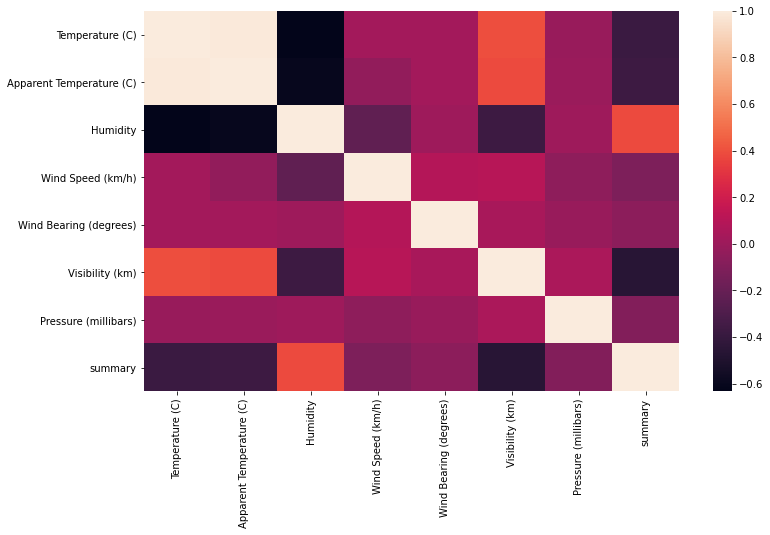

In [185]:
sns.heatmap(data.corr())

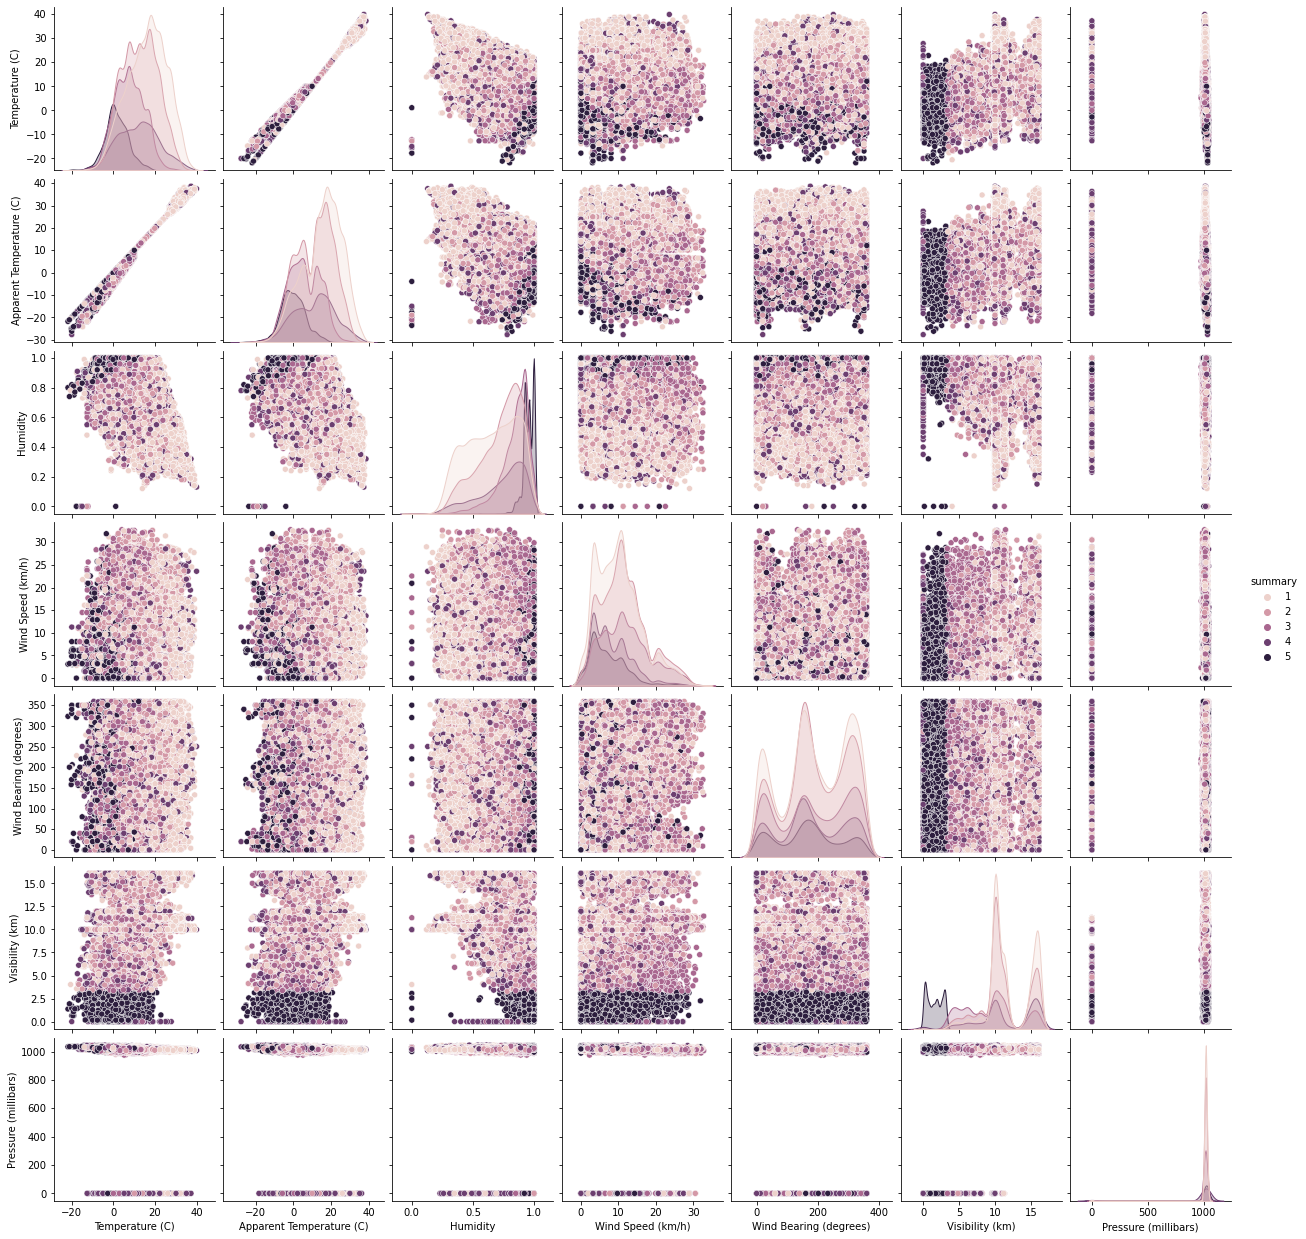

In [186]:
sns.pairplot(data,hue='summary')

In [187]:
data['summary'].value_counts()

1    19087
2    16887
3     9887
4     6539
5     4277
Name: summary, dtype: int64

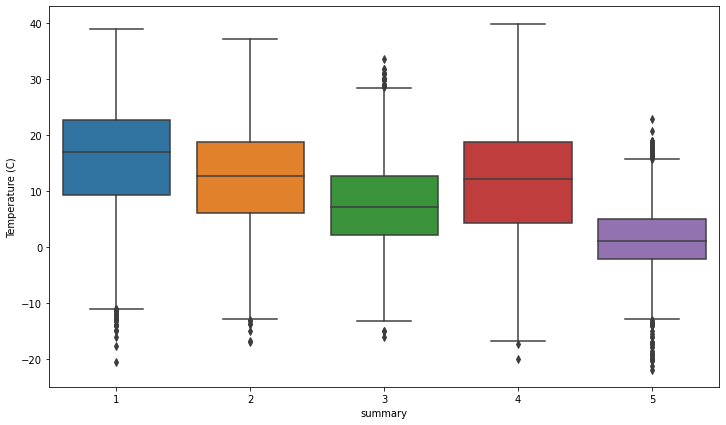

In [188]:
b1 = sns.boxplot(x="summary", y="Temperature (C)", data=data)

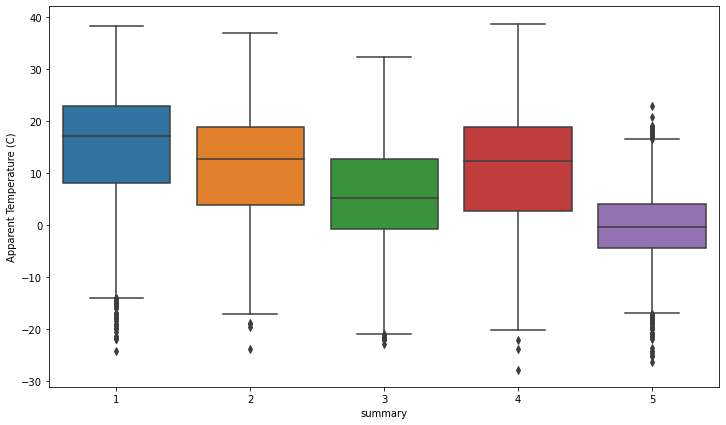

In [189]:
b2 = sns.boxplot(x="summary", y="Apparent Temperature (C)", data=data)

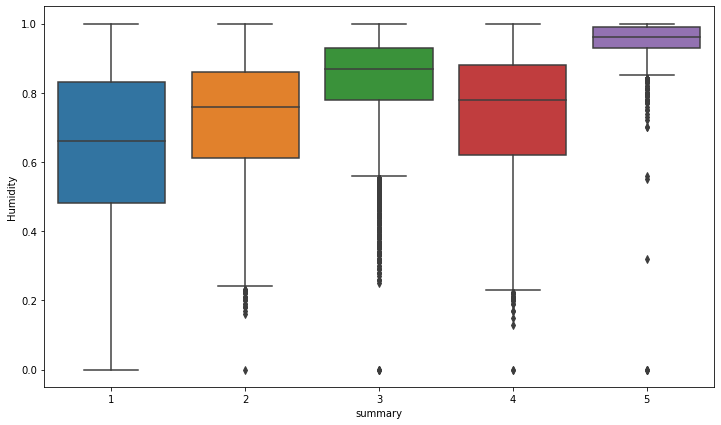

In [190]:
b3 = sns.boxplot(x="summary", y="Humidity", data=data)

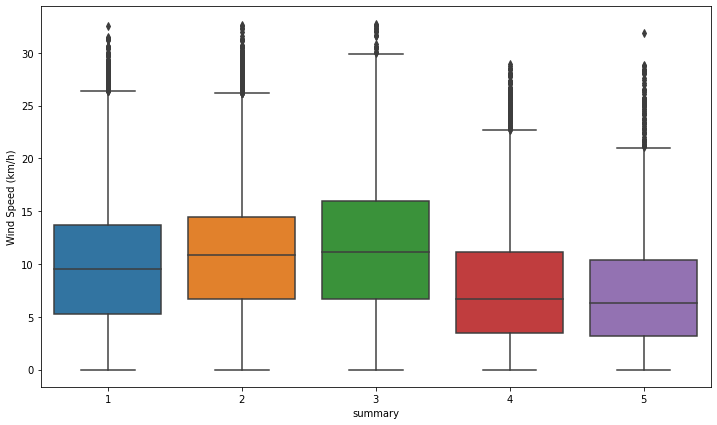

In [191]:
b4 = sns.boxplot(x="summary", y="Wind Speed (km/h)", data=data)

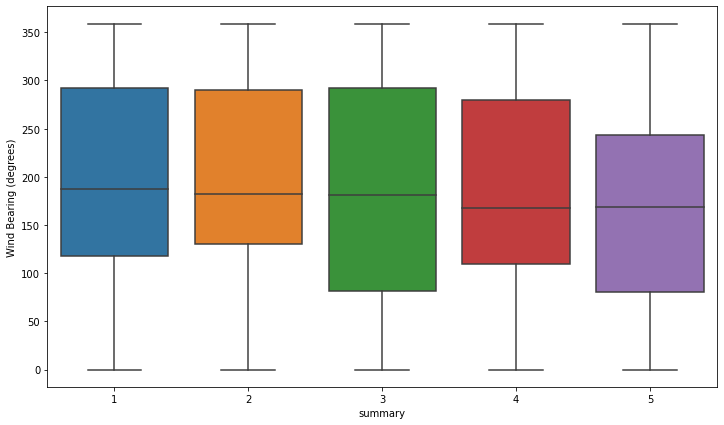

In [192]:
b5 = sns.boxplot(x="summary", y=data.columns[4], data=data)

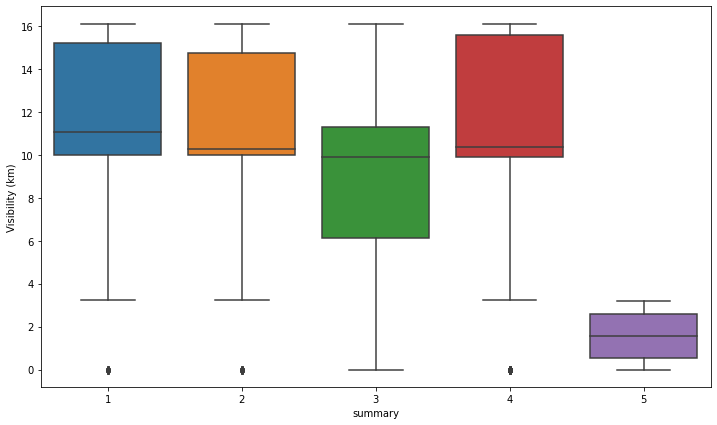

In [193]:
b5 = sns.boxplot(x="summary", y=data.columns[5], data=data)

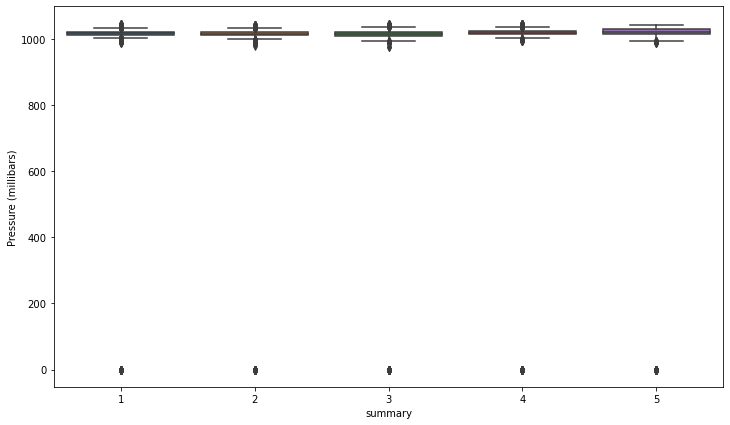

In [194]:
b5 = sns.boxplot(x="summary", y=data.columns[6], data=data)

In [195]:
data.shape

(56677, 8)

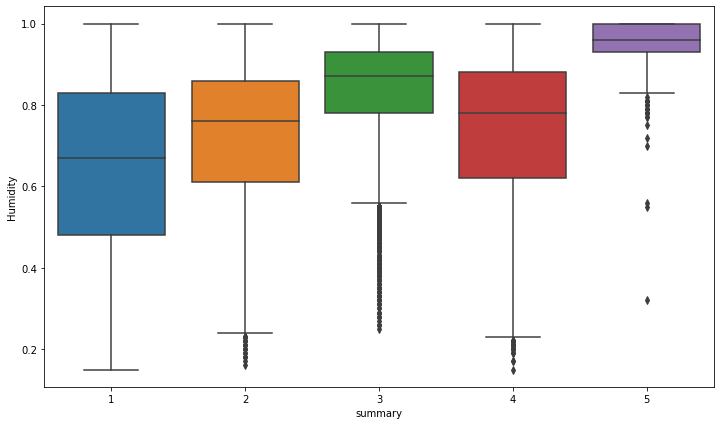

In [196]:
#removing outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1;
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
b3 = sns.boxplot(x="summary", y="Humidity", data=data)

In [208]:
data.describe()
data.to_csv("wh_data.csv")

In [199]:
IQR-Q1, IQR+Q3

(Temperature (C)                9.733333
 Apparent Temperature (C)      14.144444
 Humidity                      -0.300000
 Wind Speed (km/h)              2.720900
 Wind Bearing (degrees)        62.000000
 Visibility (km)               -1.738800
 Pressure (millibars)       -1002.880000
 summary                        1.000000
 dtype: float64,
 Temperature (C)               33.133333
 Apparent Temperature (C)      35.338889
 Humidity                       1.200000
 Wind Speed (km/h)             22.298500
 Wind Bearing (degrees)       466.000000
 Visibility (km)               21.445200
 Pressure (millibars)        1030.330000
 summary                        5.000000
 dtype: float64)

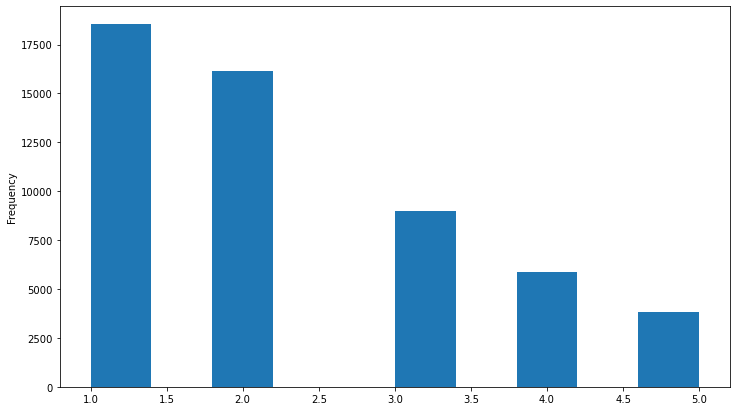

In [200]:
ax = data['summary'].plot.hist(bins=10, alpha=1)

In [203]:
X = data.drop('summary',axis=1)
Y = data['summary']
X.to_csv('trainx.csv')
Y.to_csv('trainy.csv')

In [212]:
normalized_df=(X-X.min())/(X.max()-X.min())
normalized_df
normalized_df.to_csv('norm_trainx.csv');

norm_testx = pd.read_csv('testx.csv')
norm_testx = norm_testx.drop('Unnamed: 0',axis=1)
norm_testx = (norm_testx - X.min())/(X.max()-X.min());
norm_testx.to_csv("norm_testx.csv");

In [213]:
normalized_df=(X-X.mean())/(X.std())
normalized_df
normalized_df.to_csv('norm_trainx.csv');

norm_testx = pd.read_csv('testx.csv')
norm_testx = norm_testx.drop('Unnamed: 0',axis=1)
norm_testx = (norm_testx - X.mean())/(X.std());
norm_testx.to_csv("stad_testx.csv");

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.500249,0.544521,0.835294,0.826537,0.000000,0.620,0.298169
1,0.435405,0.484732,0.964706,0.103469,0.426184,0.017,0.608363
2,0.329587,0.333333,0.882353,0.419963,0.899721,0.858,0.508609
3,0.532074,0.573865,0.670588,0.753500,0.473538,0.440,0.723695
4,0.400099,0.435030,0.964706,0.209982,0.735376,0.194,0.451216
...,...,...,...,...,...,...,...
37780,0.501044,0.545254,0.835294,0.000000,0.000000,0.620,0.251162
37781,0.570661,0.609445,0.611765,0.304321,0.111421,0.620,0.808691
37782,0.697961,0.726823,0.282353,0.489349,0.727019,0.620,0.475266
37783,0.651119,0.683631,0.811765,0.060864,0.905292,0.983,0.614649
